In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\OmKumar\tiger_assignment\raw_data.xlsx")
df_before = df.copy()
df.head()

,Trans_Num,Customer_Number,Customer_Branch,Sell_Date,Customer_LSTYR_Sales,product_id,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name
0,77686701,1,0,2016-06-07,17.39,245_20970182,Clutch,1,929.17,628.980,929.17,628.98,PRC2,COI,WEST,154.0,TS222,SOCAL WEST,TF,SOUTHWEST CALIF
1,66829575,3501,0,2015-02-20,25813.55,245_20970182,Clutch,1,943.96,607.070,943.96,628.98,PRC1,AL,CENTRAL,16.0,OPEN,SOUTH TEXAS,DB1,SOUTH TEXAS
2,58890845,10070,0,2014-01-27,83574.66,245_20970182,Clutch,1,820.20,607.070,820.20,628.98,PRC1,CC,CENTRAL,109.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS
3,73598323,10144,13,2015-11-18,78834.74,245_20970182,Clutch,1,868.80,622.748,868.80,628.98,PRC1,CC,CENTRAL,111.0,TS117,SOUTH TEXAS,DB1,SOUTH TEXAS
4,65139121,11404,22,2014-11-20,79565.88,245_20970182,Clutch,1,757.66,607.070,757.66,628.98,PRC1,CC,CENTRAL,3.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS


In [3]:
print("="*70)
print("DATA OVERVIEW")
print("="*70)
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)

DATA OVERVIEW

Dataset Shape: (5329, 20)

First few rows:
   Trans_Num  Customer_Number  Customer_Branch  Sell_Date  \
0   77686701                1                0 2016-06-07   
1   66829575             3501                0 2015-02-20   
2   58890845            10070                0 2014-01-27   
3   73598323            10144               13 2015-11-18   
4   65139121            11404               22 2014-11-20   

   Customer_LSTYR_Sales    product_id Part_Category  Quantity_Shipped  \
0                 17.39  245_20970182        Clutch                 1   
1              25813.55  245_20970182        Clutch                 1   
2              83574.66  245_20970182        Clutch                 1   
3              78834.74  245_20970182        Clutch                 1   
4              79565.88  245_20970182        Clutch                 1   

   Selling_Price  Selling_Cost  Base_Price   DCOST Price_Cluster  \
0         929.17       628.980      929.17  628.98          PRC2   


In [4]:
print("="*70)
print("MISSING VALUES")
missing_values_count = df.isnull().sum()

total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame for the missing values summary
missing_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    '% Missing Values': missing_values_percentage
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary = missing_summary.reset_index().rename(columns={'index': 'Column Name'})
missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)
missing_summary['% Missing Values'] = missing_summary['% Missing Values'].round(2).astype(str) + '%'
display(missing_summary)

MISSING VALUES


,Column Name,Missing Values,% Missing Values
0,Customer_LSTYR_Sales,2952,55.4%
1,Customer_Salesman,2952,55.4%
3,Territory_Names,24,0.45%
2,Territory_Salesperson,2,0.04%


Interpretation of missing values- (this can be further refined by talking to the business)

1. Customer_LSTYR_Sales (55.4% missing):
- Business Interpretation: Sale from Previous year - missing which means these customers are new customers.
- Treatment? replacing the null values with 0 (since these are new customers, last year sales are 0)

2. Customer_Salesman (55.4% missing):
- Business Interpretation: Salesperson assigned to customer. Missing means new customers or unassgined accounts
- Treatment? replacing the null values with 'Unassigned'

3. Territory_Names (0.45% missing):
- Business Interpretation: Very small number, it doesn't affect the overall analysis.
- Treatment? replace the null values with 'Unknown Territory'

4. Territory_Salesperson (0.04% missing):
- Business Interpretation: very very small values, insignificant
- Treatment? replace null values with ''Unknown_TS'

In [5]:
#missing values treatment
df['Customer_LSTYR_Sales'].fillna(0, inplace=True)
df['Customer_Salesman'].fillna('Unassigned', inplace=True)
df['Territory_Names'].fillna('Unknown_Territory', inplace=True)
df['Territory_Salesperson'].fillna('Unknown_TS', inplace=True)

#checking
df.isnull().sum()

Trans_Num                0
Customer_Number          0
Customer_Branch          0
Sell_Date                0
Customer_LSTYR_Sales     0
product_id               0
Part_Category            0
Quantity_Shipped         0
Selling_Price            0
Selling_Cost             0
Base_Price               0
DCOST                    0
Price_Cluster            0
Selling_Location         0
Location_Region          0
Customer_Salesman        0
Territory_Salesperson    0
Territory_Names          0
Area_Manager             0
Area_Name                0
dtype: int64

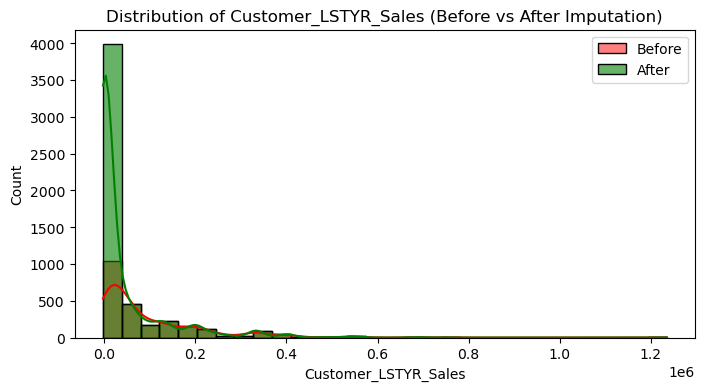

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df_before['Customer_LSTYR_Sales'], bins=30, kde=True,
             color='red', label='Before')
sns.histplot(df['Customer_LSTYR_Sales'], bins=30, kde=True,
             color='green', label='After', alpha=0.6)
plt.title("Distribution of Customer_LSTYR_Sales (Before vs After Imputation)")
plt.xlabel("Customer_LSTYR_Sales")
plt.legend()
plt.show()


The histogram shows that imputing zeros added a spike at 0 (representing new customers), while preserving the overall distribution for existing ones — meaning our imputation didn’t distort the original sales spread.

In [7]:
print("\n" + "="*70)
print("FEATURE ENGINEERING")
print("="*70)

#new metrics
df['Discount_Pct'] = ((df['Base_Price'] - df['Selling_Price']) / df['Base_Price']) * 100
df['Gross_Margin'] = df['Selling_Price'] - df['Selling_Cost']
df['Gross_Margin_Pct'] = ((df['Selling_Price'] - df['Selling_Cost']) / df['Selling_Price']) * 100
df['Total_Revenue'] = df['Selling_Price'] * df['Quantity_Shipped']
df['Total_Profit'] = (df['Selling_Price'] - df['Selling_Cost']) * df['Quantity_Shipped']
df['Total_Cost'] = df['Selling_Cost'] * df['Quantity_Shipped']
df['Unit_Profit'] = df['Selling_Price'] - df['Selling_Cost']

print("\nNew Features Created:")
print("- Discount_Pct: Percentage discount from base price")
print("- Gross_Margin_Pct: Profit margin as percentage of selling price")
print("- Total_Revenue: Revenue per transaction")
print("- Total_Profit: Profit per transaction")
print("- Total_Cost: Cost per transaction")
print("- Unit_Profit: Profit per unit")

print(f"\nSample of calculated metrics:")
print(df[['Discount_Pct', 'Gross_Margin_Pct', 'Total_Revenue', 'Total_Profit']].head())



FEATURE ENGINEERING

New Features Created:
- Discount_Pct: Percentage discount from base price
- Gross_Margin_Pct: Profit margin as percentage of selling price
- Total_Revenue: Revenue per transaction
- Total_Profit: Profit per transaction
- Total_Cost: Cost per transaction
- Unit_Profit: Profit per unit

Sample of calculated metrics:
   Discount_Pct  Gross_Margin_Pct  Total_Revenue  Total_Profit
0           0.0         32.307328         929.17       300.190
1           0.0         35.689012         943.96       336.890
2           0.0         25.985126         820.20       213.130
3           0.0         28.320902         868.80       246.052
4           0.0         19.875670         757.66       150.590


In [8]:
# ====================================================================
# 3. EXPLORATORY DATA ANALYSIS
# ====================================================================

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# 3.1 Overall Discount Statistics
print("\n--- DISCOUNT STATISTICS ---")
discount_stats = df['Discount_Pct'].describe()
print(discount_stats)
print(f"\nMedian Discount: {df['Discount_Pct'].median():.2f}%")
print(f"Mode Discount: {df['Discount_Pct'].mode().values[0]:.2f}%")

# Identify transactions with negative discounts (premium pricing)
premium_txns = df[df['Discount_Pct'] < 0]
print(f"\nTransactions with Premium Pricing (Discount < 0): {len(premium_txns)} ({len(premium_txns)/len(df)*100:.2f}%)")

# Identify transactions with no discount
no_discount = df[df['Discount_Pct'] == 0]
print(f"Transactions with No Discount: {len(no_discount)} ({len(no_discount)/len(df)*100:.2f}%)")

# High discount transactions
high_discount = df[df['Discount_Pct'] > 20]
print(f"Transactions with High Discount (>20%): {len(high_discount)} ({len(high_discount)/len(df)*100:.2f}%)")

# 3.2 Profit Margin Statistics
print("\n--- PROFIT MARGIN STATISTICS ---")
margin_stats = df['Gross_Margin_Pct'].describe()
print(margin_stats)
print(f"\nMedian Profit Margin: {df['Gross_Margin_Pct'].median():.2f}%")

# Low margin transactions
low_margin = df[df['Gross_Margin_Pct'] < 10]
print(f"\nTransactions with Low Margin (<10%): {len(low_margin)} ({len(low_margin)/len(df)*100:.2f}%)")

# Negative margin transactions (loss-making)
negative_margin = df[df['Gross_Margin_Pct'] < 0]
print(f"Loss-Making Transactions (Margin < 0): {len(negative_margin)} ({len(negative_margin)/len(df)*100:.2f}%)")

# 3.3 Create Discount Bands for Analysis
df['Discount_Band'] = pd.cut(df['Discount_Pct'], 
                              bins=[-np.inf, 0, 5, 10, 15, 20, np.inf],
                              labels=['Premium/No Discount', '0-5%', '5-10%', '10-15%', '15-20%', '>20%'])

print("\n--- DISCOUNT BAND DISTRIBUTION ---")
discount_band_summary = df.groupby('Discount_Band').agg({
    'Trans_Num': 'count',
    'Quantity_Shipped': 'sum',
    'Total_Revenue': 'sum',
    'Total_Profit': 'sum',
    'Gross_Margin_Pct': 'mean'
}).round(2)
discount_band_summary.columns = ['Count', 'Total_Quantity', 'Total_Revenue', 'Total_Profit', 'Avg_Margin_Pct']
display(discount_band_summary)



EXPLORATORY DATA ANALYSIS

--- DISCOUNT STATISTICS ---
count    5329.000000
mean        9.335348
std         7.716997
min       -29.867932
25%         0.000000
50%        10.874262
75%        16.659180
max        36.268599
Name: Discount_Pct, dtype: float64

Median Discount: 10.87%
Mode Discount: 0.00%

Transactions with Premium Pricing (Discount < 0): 52 (0.98%)
Transactions with No Discount: 1610 (30.21%)
Transactions with High Discount (>20%): 295 (5.54%)

--- PROFIT MARGIN STATISTICS ---
count    5329.000000
mean       15.006908
std         7.093998
min        -3.870968
25%         9.998353
50%        11.772073
75%        20.621617
max        46.941498
Name: Gross_Margin_Pct, dtype: float64

Median Profit Margin: 11.77%

Transactions with Low Margin (<10%): 1429 (26.82%)
Loss-Making Transactions (Margin < 0): 25 (0.47%)

--- DISCOUNT BAND DISTRIBUTION ---


,Count,Total_Quantity,Total_Revenue,Total_Profit,Avg_Margin_Pct
Discount_Band,,,,,
Premium/No Discount,1662,2037,1568804.07,306947.33,20.15
0-5%,271,286,224382.55,48657.93,21.67
5-10%,571,648,477526.47,81100.05,17.18
10-15%,1058,1440,1005611.63,125411.52,12.86
15-20%,1472,2033,1379088.52,145278.82,10.48
>20%,295,391,256431.03,15550.58,6.00


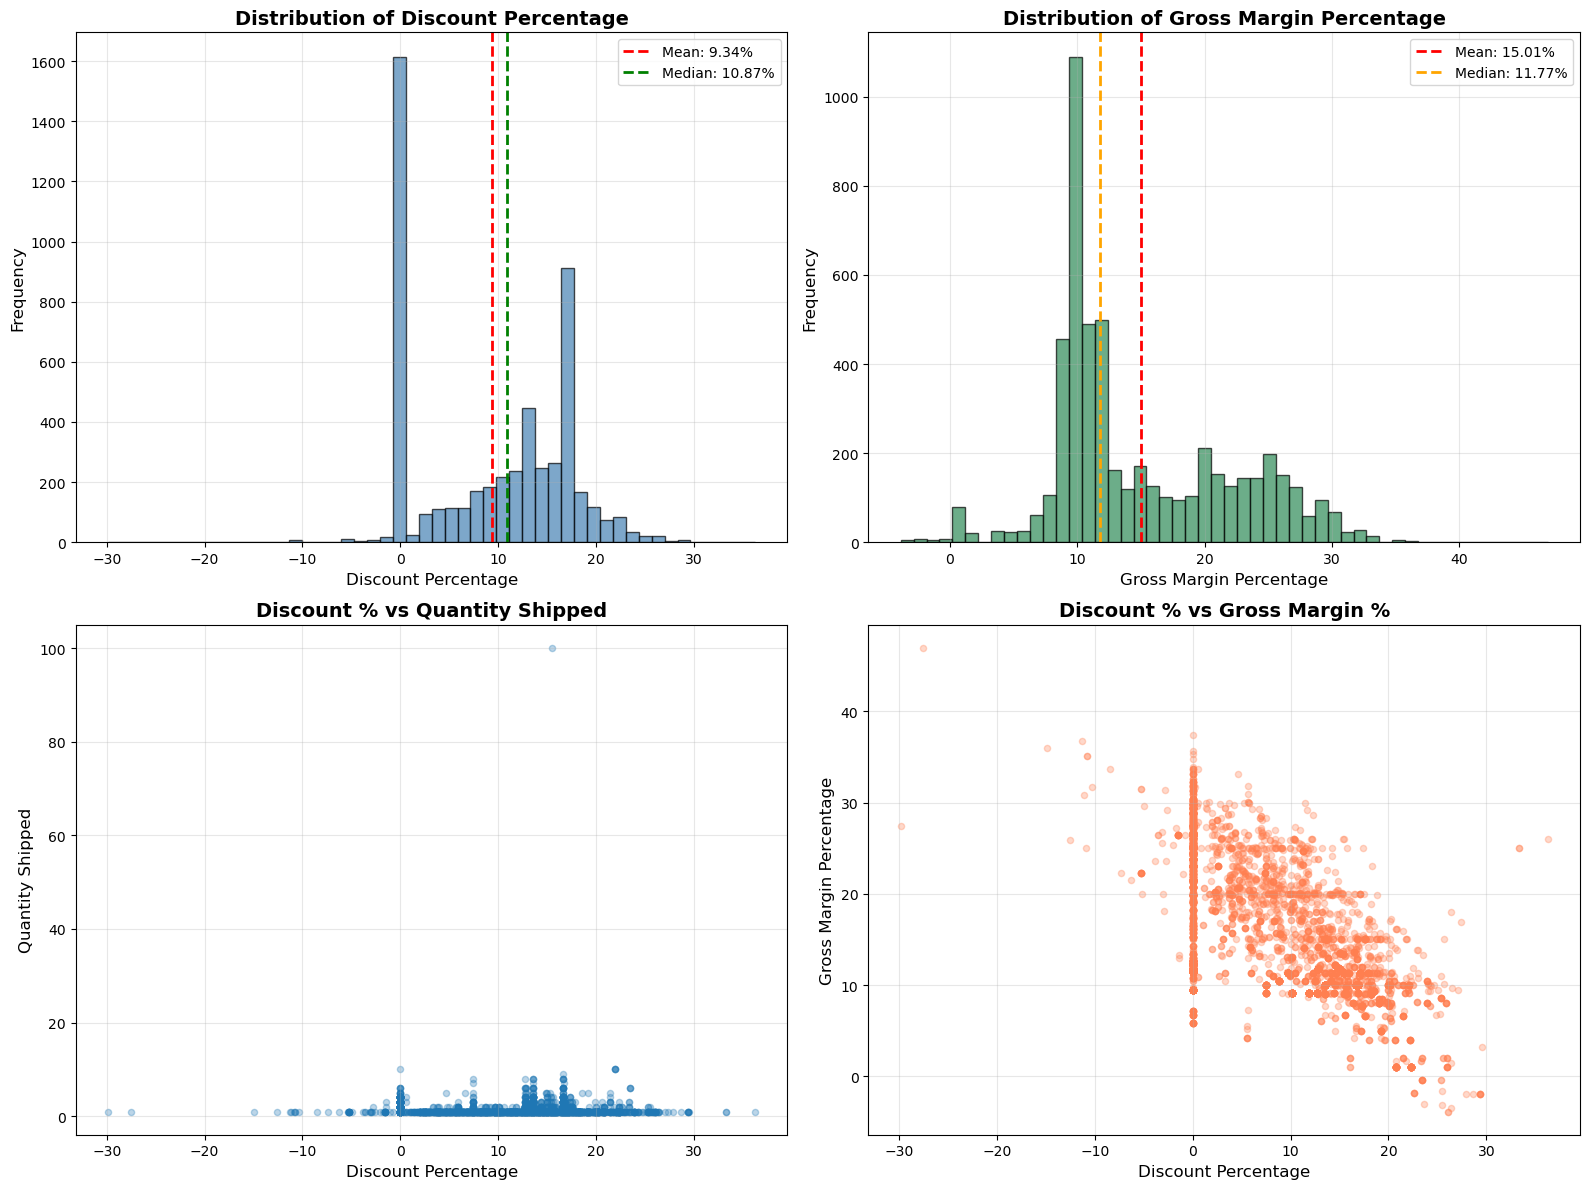

In [9]:
# ====================================================================
# 4. VISUALIZATION - DISCOUNT AND MARGIN DISTRIBUTIONS
# ====================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Discount Distribution
axes[0, 0].hist(df['Discount_Pct'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df['Discount_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Discount_Pct"].mean():.2f}%')
axes[0, 0].axvline(df['Discount_Pct'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Discount_Pct"].median():.2f}%')
axes[0, 0].set_xlabel('Discount Percentage', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Discount Percentage', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Profit Margin Distribution
axes[0, 1].hist(df['Gross_Margin_Pct'], bins=50, edgecolor='black', alpha=0.7, color='seagreen')
axes[0, 1].axvline(df['Gross_Margin_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Gross_Margin_Pct"].mean():.2f}%')
axes[0, 1].axvline(df['Gross_Margin_Pct'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["Gross_Margin_Pct"].median():.2f}%')
axes[0, 1].set_xlabel('Gross Margin Percentage', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Gross Margin Percentage', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Discount vs Quantity (Scatter)
axes[1, 0].scatter(df['Discount_Pct'], df['Quantity_Shipped'], alpha=0.3, s=20)
axes[1, 0].set_xlabel('Discount Percentage', fontsize=12)
axes[1, 0].set_ylabel('Quantity Shipped', fontsize=12)
axes[1, 0].set_title('Discount % vs Quantity Shipped', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Discount vs Profit Margin (Scatter)
axes[1, 1].scatter(df['Discount_Pct'], df['Gross_Margin_Pct'], alpha=0.3, s=20, c='coral')
axes[1, 1].set_xlabel('Discount Percentage', fontsize=12)
axes[1, 1].set_ylabel('Gross Margin Percentage', fontsize=12)
axes[1, 1].set_title('Discount % vs Gross Margin %', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

1. Higher discounts correlate with lower gross margins% (-0.66)-- a tradeoff directly visible

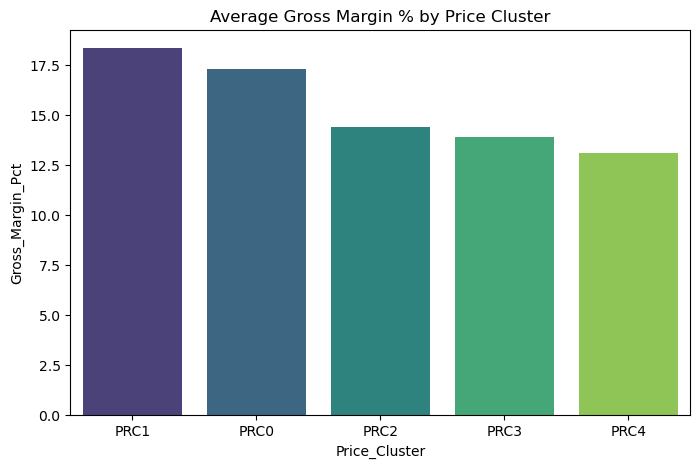

In [10]:
# Price Cluster-wise Summary
cluster_summary = df.groupby('Price_Cluster').agg({
    'Selling_Price':'mean',
    'Gross_Margin_Pct':'mean',
    'Discount_Pct':'mean',
    'Quantity_Shipped':'sum'
}).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cluster_summary.sort_values('Gross_Margin_Pct', ascending=False),
            x='Price_Cluster', y='Gross_Margin_Pct', palette='viridis')
plt.title("Average Gross Margin % by Price Cluster")
plt.show()

2. Price Cluster differ sharply in average margin - potential lever for pricing optimization

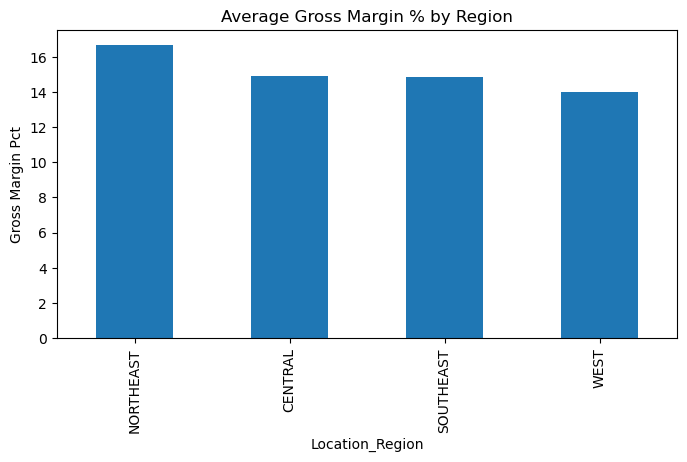

In [11]:
# Region-wise Margin Analysis
region_summary = df.groupby('Location_Region')['Gross_Margin_Pct'].mean().sort_values(ascending=False)
region_summary.plot(kind='bar', figsize=(8,4), title="Average Gross Margin % by Region")
plt.ylabel("Gross Margin Pct")
plt.show()

3. Some regions (like WEST or CENTRAL) may show margin variations — candidate for regional pricing

In [12]:
region_margin = df.groupby("Location_Region")['Gross_Margin_Pct'].mean().reset_index()\
    .rename(columns = {'Gross_Margin_Pct': 'Avg_Gross_Margin_Pct'})

region_margin

,Location_Region,Avg_Gross_Margin_Pct
0,CENTRAL,14.937813
1,NORTHEAST,16.700039
2,SOUTHEAST,14.841718
3,WEST,13.982190


In [13]:
overall_avg = region_margin["Avg_Gross_Margin_Pct"].mean()
overall_avg

15.115439908224332

In [14]:
region_margin['Region_Modifier'] = region_margin['Avg_Gross_Margin_Pct']/overall_avg
display(region_margin.round(2))

,Location_Region,Avg_Gross_Margin_Pct,Region_Modifier
0,CENTRAL,14.94,0.99
1,NORTHEAST,16.70,1.10
2,SOUTHEAST,14.84,0.98
3,WEST,13.98,0.93


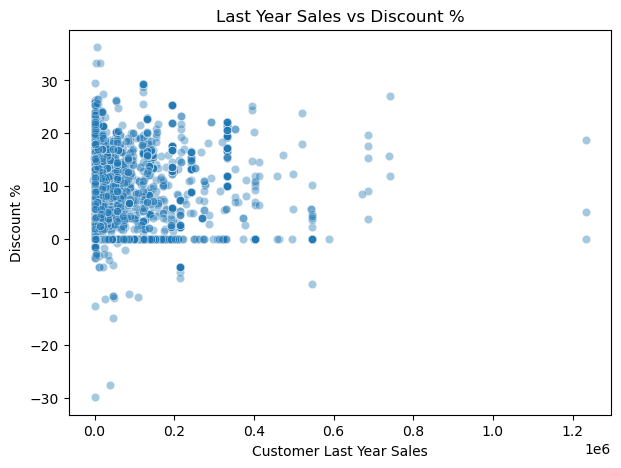

In [15]:
#  Relationship between Past Sales & Discount
plt.figure(figsize=(7,5))
sns.scatterplot(x='Customer_LSTYR_Sales', y='Discount_Pct', data=df, alpha=0.4)
plt.title("Last Year Sales vs Discount %")
plt.xlabel("Customer Last Year Sales")
plt.ylabel("Discount %")
plt.show()

4. New customers (0 prior sales) often receive steeper discounts — check acquisition vs profitability balance.

In [17]:
# CUSTOMER ANALYSIS

print("\n" + "="*70)
print("CUSTOMER SEGMENTATION ANALYSIS")
print("="*70)

# Customer size segmentation based on LastYearSales
df['Customer_Segment'] = pd.cut(df['Total_Revenue'], 
                                 bins=[-np.inf, df['Total_Revenue'].quantile(0.33), 
                                       df['Total_Revenue'].quantile(0.67), np.inf],
                                 labels=['Small', 'Medium', 'Large'])

customer_analysis = df.groupby('Customer_Segment').agg({
    'Trans_Num': 'count',
    'Discount_Pct': 'mean',
    'Gross_Margin_Pct': 'mean',
    'Quantity_Shipped': 'mean',
    'Total_Profit': 'sum',
    'Customer_LSTYR_Sales': 'mean'
}).round(2)

customer_analysis.columns = ['Txn_Count', 'Avg_Discount_Pct', 'Avg_Margin_Pct', 
                              'Avg_Quantity', 'Total_Profit', 'Avg_LastYearSales']
display(customer_analysis)



CUSTOMER SEGMENTATION ANALYSIS


,Txn_Count,Avg_Discount_Pct,Avg_Margin_Pct,Avg_Quantity,Total_Profit,Avg_LastYearSales
Customer_Segment,,,,,,
Small,1767,15.52,9.15,1.00,108733.86,21435.01
Medium,1803,6.94,15.79,1.00,211155.65,56301.80
Large,1759,5.58,20.09,1.86,403056.72,50732.38


In [18]:
# Top 10 customers by profit
top_customers = df.groupby('Customer_Number').agg({
    'Total_Profit': 'sum',
    'Trans_Num': 'count',
    'Discount_Pct': 'mean',
    'Gross_Margin_Pct': 'mean'
}).nlargest(10, 'Total_Profit').round(2)
print("\n--- TOP 10 CUSTOMERS BY PROFIT ---")
display(top_customers)


--- TOP 10 CUSTOMERS BY PROFIT ---


,Total_Profit,Trans_Num,Discount_Pct,Gross_Margin_Pct
Customer_Number,,,,
356620,148754.29,998,9.04,10.70
12300,51611.87,727,14.93,9.74
252737,28455.09,286,11.13,10.18
732648,17555.88,84,15.03,14.02
601340,14115.67,36,0.00,24.42
266575,12693.84,163,11.41,10.39
12200,9840.50,144,14.06,10.05
13007,9515.77,38,-0.10,28.11
779385,9100.50,92,6.52,13.66


In [19]:
print("\n" + "="*70)
print("PRODUCT ANALYSIS")
print("="*70)

# Analysis by Price Cluster
price_cluster_analysis = df.groupby('Price_Cluster').agg({
    'Trans_Num': 'count',
    'Discount_Pct': 'mean',
    'Gross_Margin_Pct': 'mean',
    'Total_Profit': 'sum',
    'Quantity_Shipped': 'sum'
}).round(2)
print("\n--- PRICE CLUSTER ANALYSIS ---")
display(price_cluster_analysis)


PRODUCT ANALYSIS

--- PRICE CLUSTER ANALYSIS ---


,Trans_Num,Discount_Pct,Gross_Margin_Pct,Total_Profit,Quantity_Shipped
Price_Cluster,,,,,
PRC0,39,8.74,17.29,5268.50,39
PRC1,1196,7.65,18.33,202100.70,1565
PRC2,1960,9.54,14.36,247941.20,2423
PRC3,1674,9.88,13.86,221425.40,2320
PRC4,460,10.94,13.09,46210.43,488


In [20]:
# ====================================================================
# SALES TEAM ANALYSIS
# ====================================================================


print("\n" + "="*70)
print("SALES TEAM PERFORMANCE ANALYSIS")
print("="*70)

# Salesman performance
salesman_performance = df.groupby('Customer_Salesman').agg({
    'Trans_Num': 'count',
    'Discount_Pct': 'mean',
    'Gross_Margin_Pct': 'mean',
    'Total_Profit': 'sum',
    'Total_Revenue': 'sum'
}).round(2)
salesman_performance = salesman_performance.sort_values('Total_Profit', ascending=False)
print("\n--- TOP 10 SALESMEN BY PROFIT ---")
display(salesman_performance.head(10))

# Area Manager performance
area_performance = df.groupby('Area_Manager').agg({
    'Trans_Num': 'count',
    'Discount_Pct': 'mean',
    'Gross_Margin_Pct': 'mean',
    'Total_Profit': 'sum'
}).round(2)
print("\n--- AREA MANAGER PERFORMANCE ---")
display(area_performance)



SALES TEAM PERFORMANCE ANALYSIS

--- TOP 10 SALESMEN BY PROFIT ---


,Trans_Num,Discount_Pct,Gross_Margin_Pct,Total_Profit,Total_Revenue
Customer_Salesman,,,,,
Unassigned,2952,11.12,11.11,323069.82,2917082.00
7128.0,104,13.09,15.23,21600.05,151246.82
650.0,28,0.42,23.35,12268.61,52365.56
3023.0,47,1.61,21.19,7814.84,36753.61
7710.0,31,3.40,25.09,7803.53,31154.20
4834.0,43,12.18,15.65,5000.81,31573.79
1011.0,20,2.22,27.22,4654.85,16972.90
3467.0,19,-1.25,27.85,4586.42,16220.46
3453.0,85,16.08,7.54,4305.81,57132.32



--- AREA MANAGER PERFORMANCE ---


,Trans_Num,Discount_Pct,Gross_Margin_Pct,Total_Profit
Area_Manager,,,,
AA,192,7.29,16.32,24199.16
AT,146,15.93,7.88,9062.98
BB,262,8.37,15.10,30845.40
CS1,315,8.64,14.75,40801.86
CS2,106,10.08,15.25,13628.42
DB1,126,6.91,19.50,19982.90
DB2,99,6.44,16.06,13381.02
FT,228,10.53,15.05,26438.06
GO,145,8.97,12.82,14988.05


### REGRESSION MODELING - DISCOUNT VS QUANTITY

In [21]:
print("\n" + "="*70)
print("REGRESSION MODELING: DISCOUNT % vs QUANTITY SHIPPED")
print("="*70)

# Prepare data for modeling (remove outliers and missing values)
model_df = df[['Discount_Pct', 'Quantity_Shipped', 'Customer_LSTYR_Sales', 
               'Gross_Margin_Pct']].dropna()

# Remove extreme outliers
q1 = model_df['Discount_Pct'].quantile(0.01)
q99 = model_df['Discount_Pct'].quantile(0.99)
model_df = model_df[(model_df['Discount_Pct'] >= q1) & (model_df['Discount_Pct'] <= q99)]

# MODEL 1: Simple Linear Regression
print("\n--- MODEL 1: SIMPLE LINEAR REGRESSION ---")
X_simple = model_df[['Discount_Pct']].values
y = model_df['Quantity_Shipped'].values

# Split data
X_train_s, X_test_s, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train)

# Predictions
y_pred_train_s = model_simple.predict(X_train_s)
y_pred_test_s = model_simple.predict(X_test_s)

# Evaluation
r2_train_s = r2_score(y_train, y_pred_train_s)
r2_test_s = r2_score(y_test, y_pred_test_s)
rmse_test_s = np.sqrt(mean_squared_error(y_test, y_pred_test_s))
mae_test_s = mean_absolute_error(y_test, y_pred_test_s)

print(f"\nCoefficient (Discount_Pct): {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")
print(f"\nInterpretation: For every 1% increase in discount, quantity changes by {model_simple.coef_[0]:.4f} units")
print(f"\nR² (Train): {r2_train_s:.4f}")
print(f"R² (Test): {r2_test_s:.4f}")
print(f"RMSE (Test): {rmse_test_s:.4f}")
print(f"MAE (Test): {mae_test_s:.4f}")



REGRESSION MODELING: DISCOUNT % vs QUANTITY SHIPPED

--- MODEL 1: SIMPLE LINEAR REGRESSION ---

Coefficient (Discount_Pct): 0.0113
Intercept: 1.1919

Interpretation: For every 1% increase in discount, quantity changes by 0.0113 units

R² (Train): 0.0023
R² (Test): -0.0006
RMSE (Test): 0.8530
MAE (Test): 0.4697


In [22]:
# MODEL 2: Multiple Linear Regression
print("\n--- MODEL 2: MULTIPLE LINEAR REGRESSION ---")
X_multiple = model_df[['Discount_Pct', 'Customer_LSTYR_Sales', 'Gross_Margin_Pct']].values

# Split data
X_train_m, X_test_m, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

# Train model
model_multiple = LinearRegression()
model_multiple.fit(X_train_m_scaled, y_train)

# Predictions
y_pred_train_m = model_multiple.predict(X_train_m_scaled)
y_pred_test_m = model_multiple.predict(X_test_m_scaled)

# Evaluation
r2_train_m = r2_score(y_train, y_pred_train_m)
r2_test_m = r2_score(y_test, y_pred_test_m)
rmse_test_m = np.sqrt(mean_squared_error(y_test, y_pred_test_m))
mae_test_m = mean_absolute_error(y_test, y_pred_test_m)

print(f"\nCoefficients:")
feature_names = ['Discount_Pct', 'Customer_LSTYR_Sales', 'Gross_Margin_Pct']
for name, coef in zip(feature_names, model_multiple.coef_):
    print(f"  {name}: {coef:.4f}")
print(f"Intercept: {model_multiple.intercept_:.4f}")
print(f"\nR² (Train): {r2_train_m:.4f}")
print(f"R² (Test): {r2_test_m:.4f}")
print(f"RMSE (Test): {rmse_test_m:.4f}")
print(f"MAE (Test): {mae_test_m:.4f}")



--- MODEL 2: MULTIPLE LINEAR REGRESSION ---

Coefficients:
  Discount_Pct: -0.0410
  Customer_LSTYR_Sales: -0.0175
  Gross_Margin_Pct: -0.1938
Intercept: 1.2963

R² (Train): 0.0101
R² (Test): 0.0162
RMSE (Test): 0.8458
MAE (Test): 0.4577


### SAFE DISCOUNT MARGIN IDENTIFICATION

In [23]:
# ====================================================================
# SAFE DISCOUNT MARGIN IDENTIFICATION
# ====================================================================

print("\n" + "="*70)
print("SAFE DISCOUNT MARGIN ANALYSIS")
print("="*70)

# Analyze profit margin erosion at different discount levels
discount_ranges = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 100)]
margin_erosion = []

print("\n--- PROFIT MARGIN BY DISCOUNT RANGE ---")
for low, high in discount_ranges:
    subset = df[(df['Discount_Pct'] >= low) & (df['Discount_Pct'] < high)]
    if len(subset) > 0:
        avg_margin = subset['Gross_Margin_Pct'].mean()
        median_margin = subset['Gross_Margin_Pct'].median()
        total_profit = subset['Total_Profit'].sum()
        count = len(subset)
        margin_erosion.append({
            'Discount_Range': f'{low}-{high}%',
            'Avg_Margin': avg_margin,
            'Median_Margin': median_margin,
            'Total_Profit': total_profit,
            'Transaction_Count': count
        })
        print(f"Discount {low}-{high}%: Avg Margin = {avg_margin:.2f}%, "
              f"Median = {median_margin:.2f}%, Txns = {count}, Profit = ${total_profit:,.2f}")

# Create DataFrame for analysis
margin_df = pd.DataFrame(margin_erosion)

# Identify safe discount threshold
# Define safe margin as maintaining at least 15% profit margin (adjust as needed)
MINIMUM_SAFE_MARGIN = 15

safe_discount_threshold = None
for idx, row in margin_df.iterrows():
    if row['Avg_Margin'] < MINIMUM_SAFE_MARGIN:
        safe_discount_threshold = discount_ranges[idx][0]
        break

if safe_discount_threshold is None:
    safe_discount_threshold = 25  # If all ranges are safe

print(f"\n{'='*70}")
print(f"SAFE DISCOUNT RECOMMENDATION")
print(f"{'='*70}")
print(f"\nBased on maintaining minimum {MINIMUM_SAFE_MARGIN}% profit margin:")
print(f"  → GREEN ZONE (Safe): 0-{safe_discount_threshold}%")
print(f"  → AMBER ZONE (Caution): {safe_discount_threshold}-{safe_discount_threshold+5}%")
print(f"  → RED ZONE (Risky): >{safe_discount_threshold+5}%")

# Calculate potential profit improvement
excessive_discounts = df[df['Discount_Pct'] > safe_discount_threshold]
if len(excessive_discounts) > 0:
    # Estimate profit if excessive discounts were reduced to threshold
    potential_recovery = excessive_discounts.apply(
        lambda row: (row['Base_Price'] * (1 - safe_discount_threshold/100) - row['Selling_Cost']) * row['Quantity_Shipped']
        - row['Total_Profit'], axis=1
    ).sum()
    
    print(f"\nTransactions with Excessive Discounts: {len(excessive_discounts)} ({len(excessive_discounts)/len(df)*100:.2f}%)")
    print(f"Current Profit from these transactions: ${excessive_discounts['Total_Profit'].sum():,.2f}")
    print(f"Potential Profit Recovery if capped at {safe_discount_threshold}%: ${potential_recovery:,.2f}")
    print(f"Potential Margin Improvement: {(potential_recovery/df['Total_Profit'].sum())*100:.2f}%")



SAFE DISCOUNT MARGIN ANALYSIS

--- PROFIT MARGIN BY DISCOUNT RANGE ---
Discount 0-5%: Avg Margin = 20.19%, Median = 21.51%, Txns = 1881, Profit = $343,445.70
Discount 5-10%: Avg Margin = 17.18%, Median = 17.32%, Txns = 571, Profit = $81,100.05
Discount 10-15%: Avg Margin = 12.86%, Median = 11.08%, Txns = 1058, Profit = $125,411.52
Discount 15-20%: Avg Margin = 10.48%, Median = 10.01%, Txns = 1472, Profit = $145,278.82
Discount 20-25%: Avg Margin = 6.14%, Median = 7.43%, Txns = 244, Profit = $13,523.18
Discount 25-100%: Avg Margin = 5.34%, Median = 1.95%, Txns = 51, Profit = $2,027.40

SAFE DISCOUNT RECOMMENDATION

Based on maintaining minimum 15% profit margin:
  → GREEN ZONE (Safe): 0-10%
  → AMBER ZONE (Caution): 10-15%
  → RED ZONE (Risky): >15%

Transactions with Excessive Discounts: 2825 (53.01%)
Current Profit from these transactions: $286,240.93
Potential Profit Recovery if capped at 10%: $184,602.81
Potential Margin Improvement: 25.53%


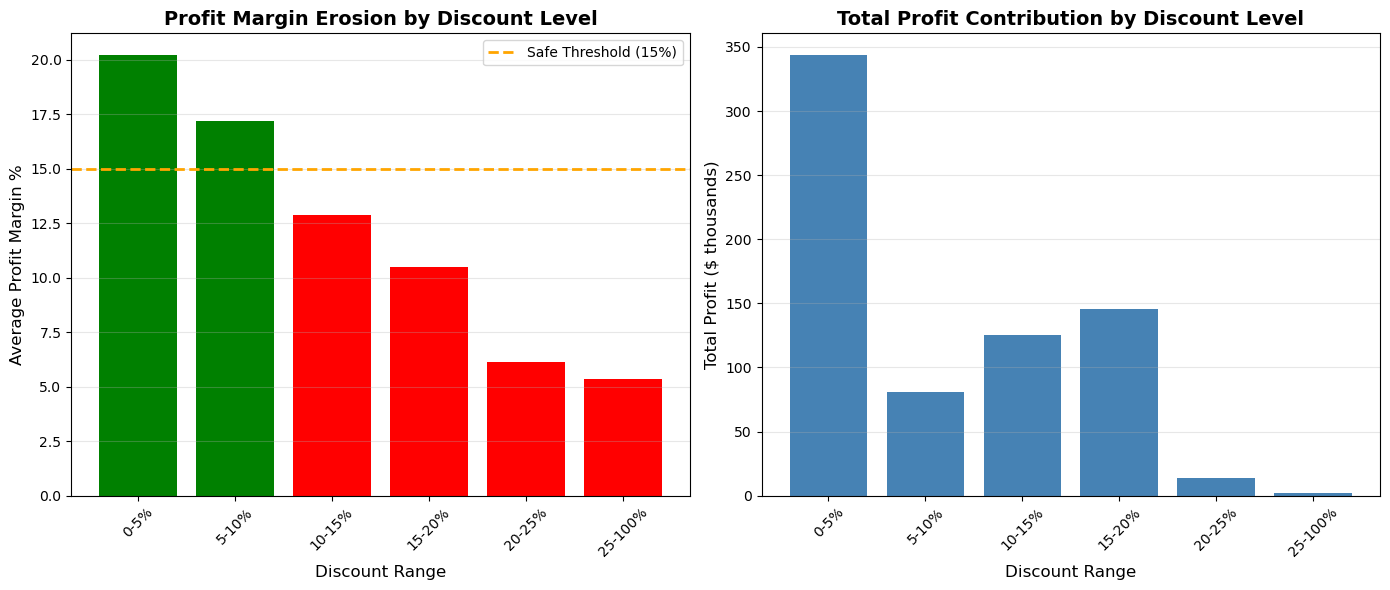

In [24]:
# ====================================================================
# 11. VISUALIZATION: MARGIN VS DISCOUNT
# ====================================================================

plt.figure(figsize=(14, 6))

# Plot 1: Average Margin by Discount Range
plt.subplot(1, 2, 1)
plt.bar(margin_df['Discount_Range'], margin_df['Avg_Margin'], 
        color=['green' if x >= MINIMUM_SAFE_MARGIN else 'red' for x in margin_df['Avg_Margin']])
plt.axhline(y=MINIMUM_SAFE_MARGIN, color='orange', linestyle='--', linewidth=2, label=f'Safe Threshold ({MINIMUM_SAFE_MARGIN}%)')
plt.xlabel('Discount Range', fontsize=12)
plt.ylabel('Average Profit Margin %', fontsize=12)
plt.title('Profit Margin Erosion by Discount Level', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3, axis='y')

# Plot 2: Total Profit by Discount Range
plt.subplot(1, 2, 2)
plt.bar(margin_df['Discount_Range'], margin_df['Total_Profit']/1000, color='steelblue')
plt.xlabel('Discount Range', fontsize=12)
plt.ylabel('Total Profit ($ thousands)', fontsize=12)
plt.title('Total Profit Contribution by Discount Level', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('safe_discount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### FINAL RECOMMENDATIONS SUMMARY

In [25]:
print("\n" + "="*70)
print("ACTIONABLE RECOMMENDATIONS")
print("="*70)

print("""
1. DISCOUNT GUIDELINES:
   - GREEN ZONE (0-{0}%): Healthy margins, standard approval
   - AMBER ZONE ({0}-{1}%): Requires supervisor approval
   - RED ZONE (>{1}%): Senior management approval only
   
2. CUSTOMER-SPECIFIC STRATEGIES:
   - Large customers: More flexibility, volume justifies lower margins
   - Medium customers: Standard guidelines with growth potential assessment
   - Small customers: Minimize discounts, focus on service value
   
3. PRODUCT-BASED RULES:
   - High-margin products: More discount flexibility
   - Commodity products: Strict discount limits
   - Bundle low-margin with high-margin items
   
4. SALES TEAM INCENTIVES:
   - Link compensation to profit margins, not just revenue
   - Recognize salesmen who maintain margins while growing volume
   - Provide real-time feedback on pricing decisions
   
5. MONITORING & CONTROL:
   - Implement dashboard for tracking discount patterns
   - Monthly reviews of salesman performance
   - Quarterly strategy refinement based on data
""".format(safe_discount_threshold, safe_discount_threshold + 5))

print(f"\n{'='*70}")
print("ANALYSIS COMPLETE - REPORTS SAVED")
print(f"{'='*70}")


ACTIONABLE RECOMMENDATIONS

1. DISCOUNT GUIDELINES:
   - GREEN ZONE (0-10%): Healthy margins, standard approval
   - AMBER ZONE (10-15%): Requires supervisor approval
   - RED ZONE (>15%): Senior management approval only
   
2. CUSTOMER-SPECIFIC STRATEGIES:
   - Large customers: More flexibility, volume justifies lower margins
   - Medium customers: Standard guidelines with growth potential assessment
   - Small customers: Minimize discounts, focus on service value
   
3. PRODUCT-BASED RULES:
   - High-margin products: More discount flexibility
   - Commodity products: Strict discount limits
   - Bundle low-margin with high-margin items
   
4. SALES TEAM INCENTIVES:
   - Link compensation to profit margins, not just revenue
   - Recognize salesmen who maintain margins while growing volume
   - Provide real-time feedback on pricing decisions
   
5. MONITORING & CONTROL:
   - Implement dashboard for tracking discount patterns
   - Monthly reviews of salesman performance
   - Quarterly s

## Time Series Analysis

In [ ]:
# !pip install prophet

In [26]:
from datetime import datetime, timedelta
from prophet import Prophet

In [27]:
df['Sell_Date'] = pd.to_datetime(df['Sell_Date'])


df['Year'] = df['Sell_Date'].dt.year
df['Month'] = df['Sell_Date'].dt.month
df['Quarter'] = df['Sell_Date'].dt.quarter
df['Week'] = df['Sell_Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Sell_Date'].dt.dayofweek
df['DayName'] = df['Sell_Date'].dt.day_name()
df['MonthName'] = df['Sell_Date'].dt.month_name()
df['YearMonth'] = df['Sell_Date'].dt.to_period('M')

In [28]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'Base_Price',
       'DCOST', 'Price_Cluster', 'Selling_Location', 'Location_Region',
       'Customer_Salesman', 'Territory_Salesperson', 'Territory_Names',
       'Area_Manager', 'Area_Name', 'Discount_Pct', 'Gross_Margin',
       'Gross_Margin_Pct', 'Total_Revenue', 'Total_Profit', 'Total_Cost',
       'Unit_Profit', 'Discount_Band', 'Customer_Segment', 'Year', 'Month',
       'Quarter', 'Week', 'DayOfWeek', 'DayName', 'MonthName', 'YearMonth'],
      dtype='object')

In [29]:
print(f"\nData Range: {df['Sell_Date'].min()} to {df['Sell_Date'].max()}")


Data Range: 2013-01-02 00:00:00 to 2016-11-30 00:00:00


In [30]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'Base_Price',
       'DCOST', 'Price_Cluster', 'Selling_Location', 'Location_Region',
       'Customer_Salesman', 'Territory_Salesperson', 'Territory_Names',
       'Area_Manager', 'Area_Name', 'Discount_Pct', 'Gross_Margin',
       'Gross_Margin_Pct', 'Total_Revenue', 'Total_Profit', 'Total_Cost',
       'Unit_Profit', 'Discount_Band', 'Customer_Segment', 'Year', 'Month',
       'Quarter', 'Week', 'DayOfWeek', 'DayName', 'MonthName', 'YearMonth'],
      dtype='object')

In [31]:
monthly_agg = (
    df.groupby(['Year', 'Month', 'MonthName'])
      .agg(
          Total_Revenue=('Total_Revenue', 'sum'),
          Total_Profit=('Total_Profit', 'sum'),
          Gross_Margin_Pct=('Gross_Margin_Pct', 'mean'),
          Quantity_sold = ('Quantity_Shipped', 'sum')
      )
      .reset_index().sort_values(by = ['Year','Month'], ascending= True)
)
monthly_agg

,Year,Month,MonthName,Total_Revenue,Total_Profit,Gross_Margin_Pct,Quantity_sold
0,2013,1,January,120595.50,16009.842,13.363165,174
1,2013,2,February,101734.59,12776.674,12.672724,148
2,2013,3,March,128941.45,15940.854,12.661877,188
3,2013,4,April,122471.23,15481.304,12.688491,178
4,2013,5,May,174291.25,22221.299,14.028579,253
5,2013,6,June,96897.88,13349.567,14.163825,139
6,2013,7,July,119851.11,17068.653,14.556673,171
7,2013,8,August,108178.57,15013.185,14.162687,155
8,2013,9,September,79152.12,11231.549,14.774164,113
9,2013,10,October,98393.08,13642.633,14.087775,141


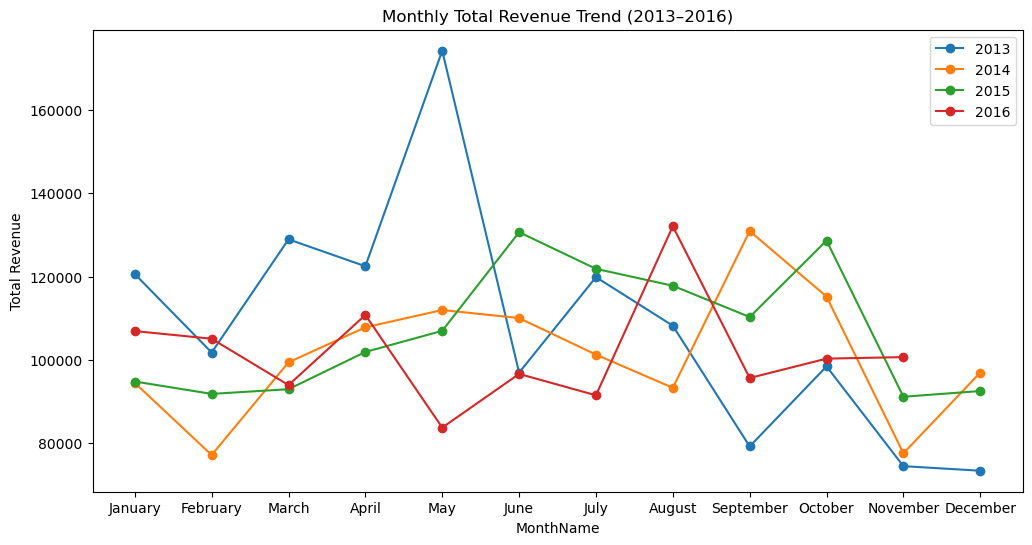

In [32]:
plt.figure(figsize=(12,6))
for yr in sorted(monthly_agg['Year'].unique()):
    subset = monthly_agg[monthly_agg['Year'] == yr]
    plt.plot(subset['MonthName'], subset['Total_Revenue'], marker='o', label=str(yr))
plt.title("Monthly Total Revenue Trend (2013–2016)")
plt.xlabel("MonthName")
plt.ylabel("Total Revenue")
plt.legend()

plt.show()

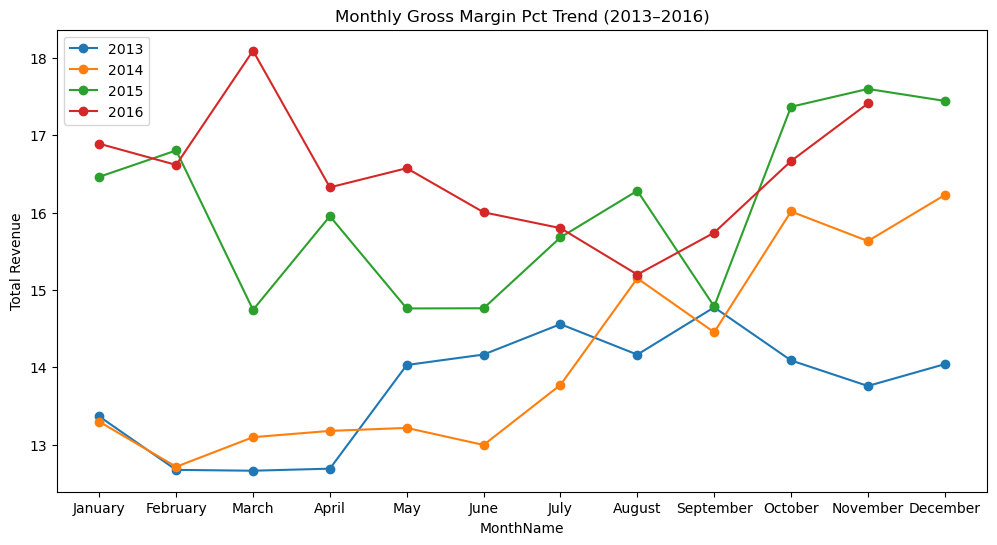

In [33]:
plt.figure(figsize=(12,6))
for yr in sorted(monthly_agg['Year'].unique()):
    subset = monthly_agg[monthly_agg['Year'] == yr]
    plt.plot(subset['MonthName'], subset['Gross_Margin_Pct'], marker='o', label=str(yr))
plt.title("Monthly Gross Margin Pct Trend (2013–2016)")
plt.xlabel("MonthName")
plt.ylabel("Total Revenue")
plt.legend()

plt.show()

In [34]:
#Quarterly level aggregation
quarter_agg = (
    df.groupby(['Year', 'Quarter'])
      .agg(
          Total_Revenue=('Total_Revenue', 'sum'),
          Total_Profit=('Total_Profit', 'sum'),
          Gross_Margin_Pct=('Gross_Margin_Pct', 'mean'),
          Quantity_sold = ('Quantity_Shipped', 'sum')
      )
      .reset_index().sort_values(by = ['Year','Quarter'], ascending= True)
)
quarter_agg

,Year,Quarter,Total_Revenue,Total_Profit,Gross_Margin_Pct,Quantity_sold
0,2013,1,351271.54,44727.370,12.912483,510
1,2013,2,393660.36,51052.170,13.542937,570
2,2013,3,307181.80,43313.387,14.471631,439
3,2013,4,246115.45,33902.781,13.971497,353
4,2014,1,270893.98,34743.750,13.054495,389
5,2014,2,329750.33,43213.290,13.131565,472
6,2014,3,325421.25,46169.050,14.449126,460
7,2014,4,289581.96,44885.716,15.987079,403
8,2015,1,279459.70,43027.266,15.977597,389
9,2015,2,339483.72,49283.152,15.122460,466


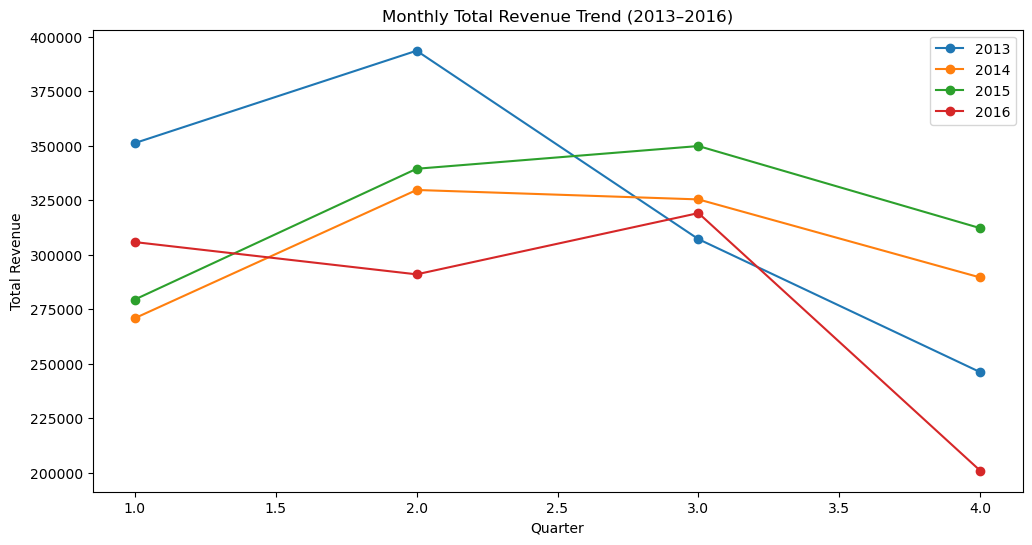

In [35]:
plt.figure(figsize=(12,6))
for yr in sorted(quarter_agg['Year'].unique()):
    subset = quarter_agg[quarter_agg['Year'] == yr]
    plt.plot(subset['Quarter'], subset['Total_Revenue'], marker='o', label=str(yr))
plt.title("Monthly Total Revenue Trend (2013–2016)")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.legend()

plt.show()

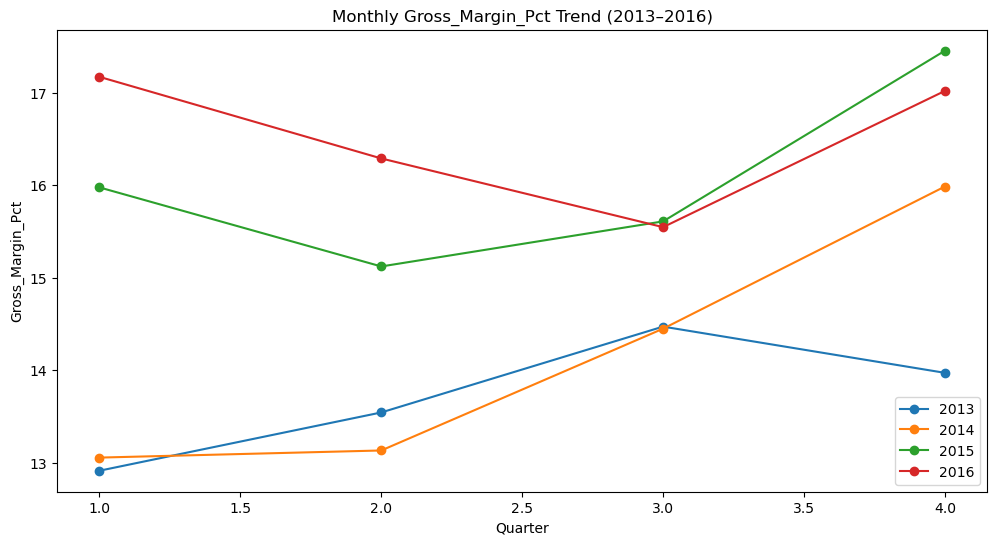

In [36]:
plt.figure(figsize=(12,6))
for yr in sorted(quarter_agg['Year'].unique()):
    subset = quarter_agg[quarter_agg['Year'] == yr]
    plt.plot(subset['Quarter'], subset['Gross_Margin_Pct'], marker='o', label=str(yr))
plt.title("Monthly Gross_Margin_Pct Trend (2013–2016)")
plt.xlabel("Quarter")
plt.ylabel("Gross_Margin_Pct")
plt.legend()

plt.show()

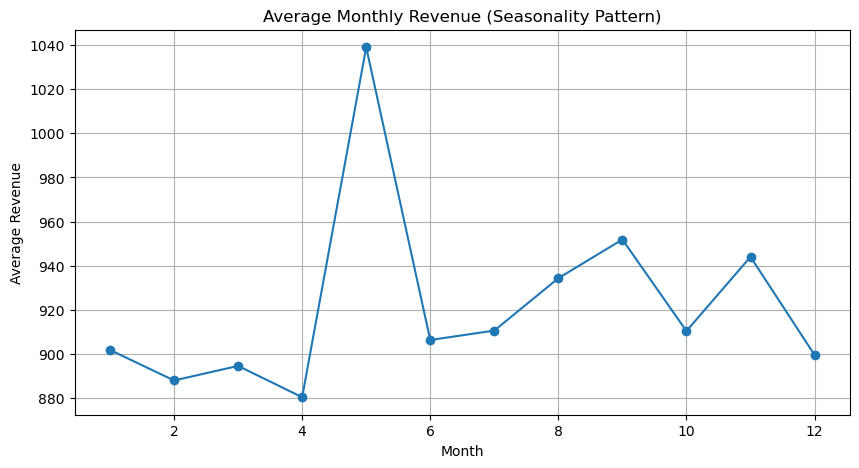

In [37]:
# Average monthly trend across all years (seasonality pattern)
avg_monthly = (
    df.groupby('Month')
      .agg(
          avg_revenue=('Total_Revenue', 'mean'),
          avg_profit=('Total_Profit', 'mean'),
          avg_margin=('Gross_Margin_Pct', 'mean'),
          avg_quantity_sold = ('Quantity_Shipped', 'mean')
      )
      .reset_index()
)

# Visualize average monthly pattern
plt.figure(figsize=(10,5))
plt.plot(avg_monthly['Month'], avg_monthly['avg_revenue'], marker='o', color='tab:blue')
plt.title("Average Monthly Revenue (Seasonality Pattern)")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.grid(True)
plt.show()


This shows seasonal peaks (May Month) independent of specific years, i.e., overall pattern of which months perform better across 2013–2016.

In [38]:
monthly_agg.columns

Index(['Year', 'Month', 'MonthName', 'Total_Revenue', 'Total_Profit',
       'Gross_Margin_Pct', 'Quantity_sold'],
      dtype='object')

In [39]:
monthly_agg['Revenue_MoM_Growth'] = monthly_agg['Total_Revenue'].pct_change() * 100
monthly_agg['Profit_MoM_Growth'] = monthly_agg['Total_Profit'].pct_change() * 100
monthly_agg['Quantity_MoM_Growth'] = monthly_agg['Quantity_sold'].pct_change() * 100

In [40]:
monthly_agg

,Year,Month,MonthName,Total_Revenue,Total_Profit,Gross_Margin_Pct,Quantity_sold,Revenue_MoM_Growth,Profit_MoM_Growth,Quantity_MoM_Growth
0,2013,1,January,120595.50,16009.842,13.363165,174,NaN,NaN,NaN
1,2013,2,February,101734.59,12776.674,12.672724,148,-15.639812,-20.194878,-14.942529
2,2013,3,March,128941.45,15940.854,12.661877,188,26.742979,24.765287,27.027027
3,2013,4,April,122471.23,15481.304,12.688491,178,-5.017952,-2.882844,-5.319149
4,2013,5,May,174291.25,22221.299,14.028579,253,42.311994,43.536352,42.134831
5,2013,6,June,96897.88,13349.567,14.163825,139,-44.404622,-39.924453,-45.059289
6,2013,7,July,119851.11,17068.653,14.556673,171,23.688062,27.859226,23.021583
7,2013,8,August,108178.57,15013.185,14.162687,155,-9.739201,-12.042356,-9.356725
8,2013,9,September,79152.12,11231.549,14.774164,113,-26.831978,-25.188766,-27.096774
9,2013,10,October,98393.08,13642.633,14.087775,141,24.308837,21.467066,24.778761


## FORECASTING

In [41]:
print("\n" + "="*70)
print("FACEBOOK PROPHET FORECASTING - NEXT 3 MONTHS")
print("="*70)


FACEBOOK PROPHET FORECASTING - NEXT 3 MONTHS


In [42]:
# Daily aggregation
daily_sales = df.groupby('Sell_Date').agg({
    'Trans_Num': 'count',
    'Total_Revenue': 'sum',
    'Total_Profit': 'sum',
    'Total_Cost': 'sum',
    'Quantity_Shipped': 'sum',
    'Discount_Pct': 'mean'
}).reset_index()
daily_sales.columns = ['Date', 'Transactions', 'Revenue', 'Profit', 'Cost', 'Quantity', 'Avg_Discount']
daily_sales['Gross_Margin_Pct'] = (daily_sales['Profit'] / daily_sales['Revenue']) * 100

daily_sales

,Date,Transactions,Revenue,Profit,Cost,Quantity,Avg_Discount,Gross_Margin_Pct
0,2013-01-02,6,4329.42,723.018,3606.402,6,11.771700,16.700112
1,2013-01-03,6,4176.52,570.118,3606.402,6,13.752989,13.650551
2,2013-01-04,6,4327.45,721.048,3606.402,6,10.337900,16.662191
3,2013-01-07,8,5702.83,894.294,4808.536,8,12.256805,15.681583
4,2013-01-08,2,1267.28,65.146,1202.134,2,21.656459,5.140616
...,...,...,...,...,...,...,...,...
1040,2016-11-23,7,6082.12,1050.280,5031.840,8,9.078404,17.268321
1041,2016-11-25,5,4142.09,997.190,3144.900,5,6.009225,24.074561
1042,2016-11-28,10,8670.55,1751.770,6918.780,11,-0.193045,20.203678
1043,2016-11-29,4,5086.84,683.980,4402.860,7,8.825229,13.446069


In [43]:
prophet_df = daily_sales[['Date', 'Profit']].copy()
prophet_df.columns = ['ds', 'y']

In [44]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10
)
model.fit(prophet_df)

00:55:20 - cmdstanpy - INFO - Chain [1] start processing
00:55:21 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=90)

In [46]:
print("Generating forecasts...")
forecast = model.predict(future)

# Display forecast summary
print("\n--- FORECAST SUMMARY (Next 3 Months) ---")
future_forecast = forecast[forecast['ds'] > prophet_df['ds'].max()].copy()
future_forecast['Month'] = future_forecast['ds'].dt.to_period('M')

monthly_forecast = future_forecast.groupby('Month').agg({
    'yhat': 'sum',
    'yhat_lower': 'sum',
    'yhat_upper': 'sum'
}).reset_index()

Generating forecasts...

--- FORECAST SUMMARY (Next 3 Months) ---


In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,600.433409,110.640009,1184.564356,600.433409,600.433409,41.442002,41.442002,41.442002,158.906494,158.906494,158.906494,-117.464492,-117.464492,-117.464492,0.0,0.0,0.0,641.875411
1,2013-01-03,600.034334,144.339127,1192.927237,600.034334,600.034334,54.778960,54.778960,54.778960,155.669527,155.669527,155.669527,-100.890567,-100.890567,-100.890567,0.0,0.0,0.0,654.813294
2,2013-01-04,599.635259,93.521191,1151.862468,599.635259,599.635259,23.764725,23.764725,23.764725,107.011545,107.011545,107.011545,-83.246820,-83.246820,-83.246820,0.0,0.0,0.0,623.399984
3,2013-01-07,598.438032,182.421624,1255.047952,598.438032,598.438032,114.240494,114.240494,114.240494,142.464947,142.464947,142.464947,-28.224454,-28.224454,-28.224454,0.0,0.0,0.0,712.678526
4,2013-01-08,598.038957,298.545953,1343.263504,598.038957,598.038957,189.621386,189.621386,189.621386,200.258064,200.258064,200.258064,-10.636678,-10.636678,-10.636678,0.0,0.0,0.0,787.660343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2017-02-24,583.234115,186.709171,1232.206032,578.888722,586.703877,96.406917,96.406917,96.406917,107.011545,107.011545,107.011545,-10.604628,-10.604628,-10.604628,0.0,0.0,0.0,679.641032
1131,2017-02-25,583.107052,-338.531252,768.951737,578.646822,586.642230,-361.671994,-361.671994,-361.671994,-345.950393,-345.950393,-345.950393,-15.721602,-15.721602,-15.721602,0.0,0.0,0.0,221.435058
1132,2017-02-26,582.979989,-389.390790,642.287120,578.456731,586.574910,-440.204509,-440.204509,-440.204509,-418.360186,-418.360186,-418.360186,-21.844323,-21.844323,-21.844323,0.0,0.0,0.0,142.775480
1133,2017-02-27,582.852926,148.911708,1229.786078,578.224939,586.585594,113.706233,113.706233,113.706233,142.464947,142.464947,142.464947,-28.758714,-28.758714,-28.758714,0.0,0.0,0.0,696.559159


In [48]:
future_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Month
1045,2016-12-01,594.034480,293.888692,1366.937193,594.034480,594.034480,232.476369,232.476369,232.476369,155.669527,155.669527,155.669527,76.806842,76.806842,76.806842,0.0,0.0,0.0,826.510849,2016-12
1046,2016-12-02,593.907417,220.757967,1332.904529,593.907417,593.907417,191.963879,191.963879,191.963879,107.011545,107.011545,107.011545,84.952333,84.952333,84.952333,0.0,0.0,0.0,785.871295,2016-12
1047,2016-12-03,593.780354,-182.577161,876.975897,593.780354,593.780354,-254.952247,-254.952247,-254.952247,-345.950393,-345.950393,-345.950393,90.998145,90.998145,90.998145,0.0,0.0,0.0,338.828106,2016-12
1048,2016-12-04,593.653290,-274.949821,841.667867,593.653290,593.653290,-323.638430,-323.638430,-323.638430,-418.360186,-418.360186,-418.360186,94.721755,94.721755,94.721755,0.0,0.0,0.0,270.014860,2016-12
1049,2016-12-05,593.526227,301.825885,1401.954164,593.526227,593.526227,238.418314,238.418314,238.418314,142.464947,142.464947,142.464947,95.953367,95.953367,95.953367,0.0,0.0,0.0,831.944542,2016-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2017-02-24,583.234115,186.709171,1232.206032,578.888722,586.703877,96.406917,96.406917,96.406917,107.011545,107.011545,107.011545,-10.604628,-10.604628,-10.604628,0.0,0.0,0.0,679.641032,2017-02
1131,2017-02-25,583.107052,-338.531252,768.951737,578.646822,586.642230,-361.671994,-361.671994,-361.671994,-345.950393,-345.950393,-345.950393,-15.721602,-15.721602,-15.721602,0.0,0.0,0.0,221.435058,2017-02
1132,2017-02-26,582.979989,-389.390790,642.287120,578.456731,586.574910,-440.204509,-440.204509,-440.204509,-418.360186,-418.360186,-418.360186,-21.844323,-21.844323,-21.844323,0.0,0.0,0.0,142.775480,2017-02
1133,2017-02-27,582.852926,148.911708,1229.786078,578.224939,586.585594,113.706233,113.706233,113.706233,142.464947,142.464947,142.464947,-28.758714,-28.758714,-28.758714,0.0,0.0,0.0,696.559159,2017-02


In [49]:
monthly_forecast

,Month,yhat,yhat_lower,yhat_upper
0,2016-12,17032.655564,356.489006,33839.434981
1,2017-01,17937.380299,1202.022555,34694.796583
2,2017-02,15144.390119,70.364640,30105.576537


In [50]:
print("\nMonthly Forecast:")
for idx, row in monthly_forecast.iterrows():
    print(f"  {row['Month']}: ${row['yhat']:,.0f} "
          f"(Range: ${row['yhat_lower']:,.0f} - ${row['yhat_upper']:,.0f})")



Monthly Forecast:
  2016-12: $17,033 (Range: $356 - $33,839)
  2017-01: $17,937 (Range: $1,202 - $34,695)
  2017-02: $15,144 (Range: $70 - $30,106)


In [51]:
# Calculate total forecast
total_forecast = future_forecast['yhat'].sum()
total_lower = future_forecast['yhat_lower'].sum()
total_upper = future_forecast['yhat_upper'].sum()
print(f"\nTotal 3-Month Forecast: ${total_forecast:,.0f}")
print(f"  Confidence Interval: ${total_lower:,.0f} - ${total_upper:,.0f}")


Total 3-Month Forecast: $50,114
  Confidence Interval: $1,629 - $98,640


In [52]:
# Compare with historical average
last_90_days = daily_sales.tail(90)['Revenue'].sum()
forecast_growth = ((total_forecast - last_90_days) / last_90_days) * 100
print(f"\nComparison with Last 90 Days: ${last_90_days:,.0f}")
print(f"Forecasted Growth: {forecast_growth:+.2f}%")



Comparison with Last 90 Days: $418,320
Forecasted Growth: -88.02%


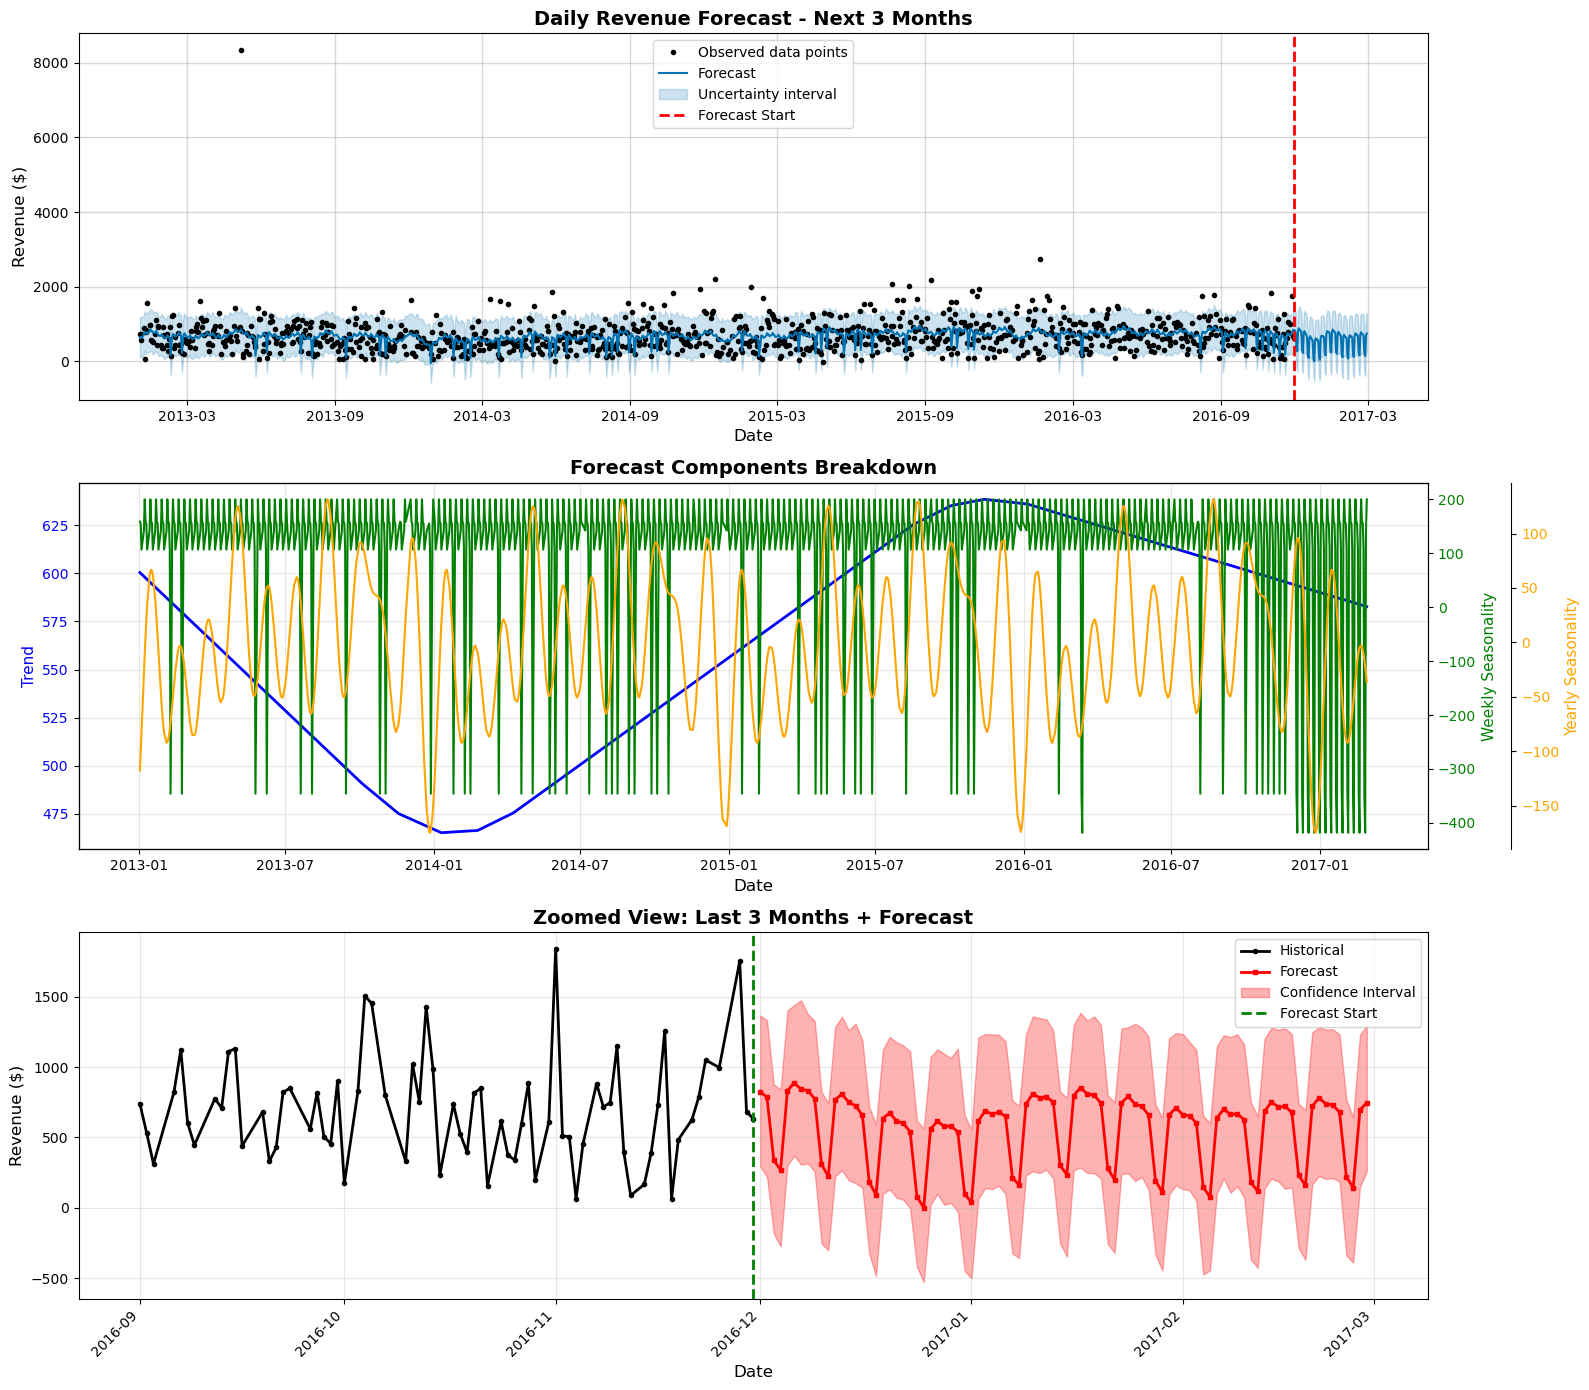


✓ Prophet forecast visualizations saved


In [53]:
# Visualization: Prophet Forecast
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Plot 1: Overall forecast
ax1 = axes[0]
model.plot(forecast, ax=ax1)
ax1.set_title('Daily Revenue Forecast - Next 3 Months', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.grid(alpha=0.3)

# Add vertical line at forecast start
forecast_start = prophet_df['ds'].max()
ax1.axvline(x=forecast_start, color='red', linestyle='--', linewidth=2, label='Forecast Start')
ax1.legend()

# Plot 2: Components (trend, weekly, yearly seasonality)
ax2 = axes[1]
ax2_twin1 = ax2.twinx()
ax2_twin2 = ax2.twinx()
ax2_twin2.spines['right'].set_position(('outward', 60))

# Plot trend
ax2.plot(forecast['ds'], forecast['trend'], color='blue', linewidth=2, label='Trend')
# Plot weekly seasonality
ax2_twin1.plot(forecast['ds'], forecast['weekly'], color='green', linewidth=1.5, label='Weekly Pattern')
# Plot yearly seasonality
ax2_twin2.plot(forecast['ds'], forecast['yearly'], color='orange', linewidth=1.5, label='Yearly Pattern')

ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Trend', fontsize=11, color='blue')
ax2_twin1.set_ylabel('Weekly Seasonality', fontsize=11, color='green')
ax2_twin2.set_ylabel('Yearly Seasonality', fontsize=11, color='orange')
ax2.set_title('Forecast Components Breakdown', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='blue')
ax2_twin1.tick_params(axis='y', labelcolor='green')
ax2_twin2.tick_params(axis='y', labelcolor='orange')
ax2.grid(alpha=0.3)

# Plot 3: Zoomed forecast (last 3 months historical + 3 months forecast)
ax3 = axes[2]
recent_date = prophet_df['ds'].max() - pd.Timedelta(days=90)
recent_actual = prophet_df[prophet_df['ds'] >= recent_date]
future_pred = forecast[forecast['ds'] > prophet_df['ds'].max()]

ax3.plot(recent_actual['ds'], recent_actual['y'], 
         color='black', linewidth=2, label='Historical', marker='o', markersize=3)
ax3.plot(future_pred['ds'], future_pred['yhat'], 
         color='red', linewidth=2, label='Forecast', marker='s', markersize=3)
ax3.fill_between(future_pred['ds'], future_pred['yhat_lower'], future_pred['yhat_upper'], 
                 alpha=0.3, color='red', label='Confidence Interval')
ax3.axvline(x=forecast_start, color='green', linestyle='--', linewidth=2, label='Forecast Start')
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Revenue ($)', fontsize=12)
ax3.set_title('Zoomed View: Last 3 Months + Forecast', fontsize=14, fontweight='bold')
ax3.legend(loc='best')
ax3.grid(alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('prophet_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Prophet forecast visualizations saved")



REGIONAL FORECASTING

Forecasting for WEST...


00:55:27 - cmdstanpy - INFO - Chain [1] start processing
00:55:27 - cmdstanpy - INFO - Chain [1] done processing
00:55:27 - cmdstanpy - INFO - Chain [1] start processing



Forecasting for CENTRAL...


00:55:27 - cmdstanpy - INFO - Chain [1] done processing



Forecasting for SOUTHEAST...


00:55:28 - cmdstanpy - INFO - Chain [1] start processing
00:55:28 - cmdstanpy - INFO - Chain [1] done processing
00:55:29 - cmdstanpy - INFO - Chain [1] start processing



Forecasting for NORTHEAST...


00:55:29 - cmdstanpy - INFO - Chain [1] done processing


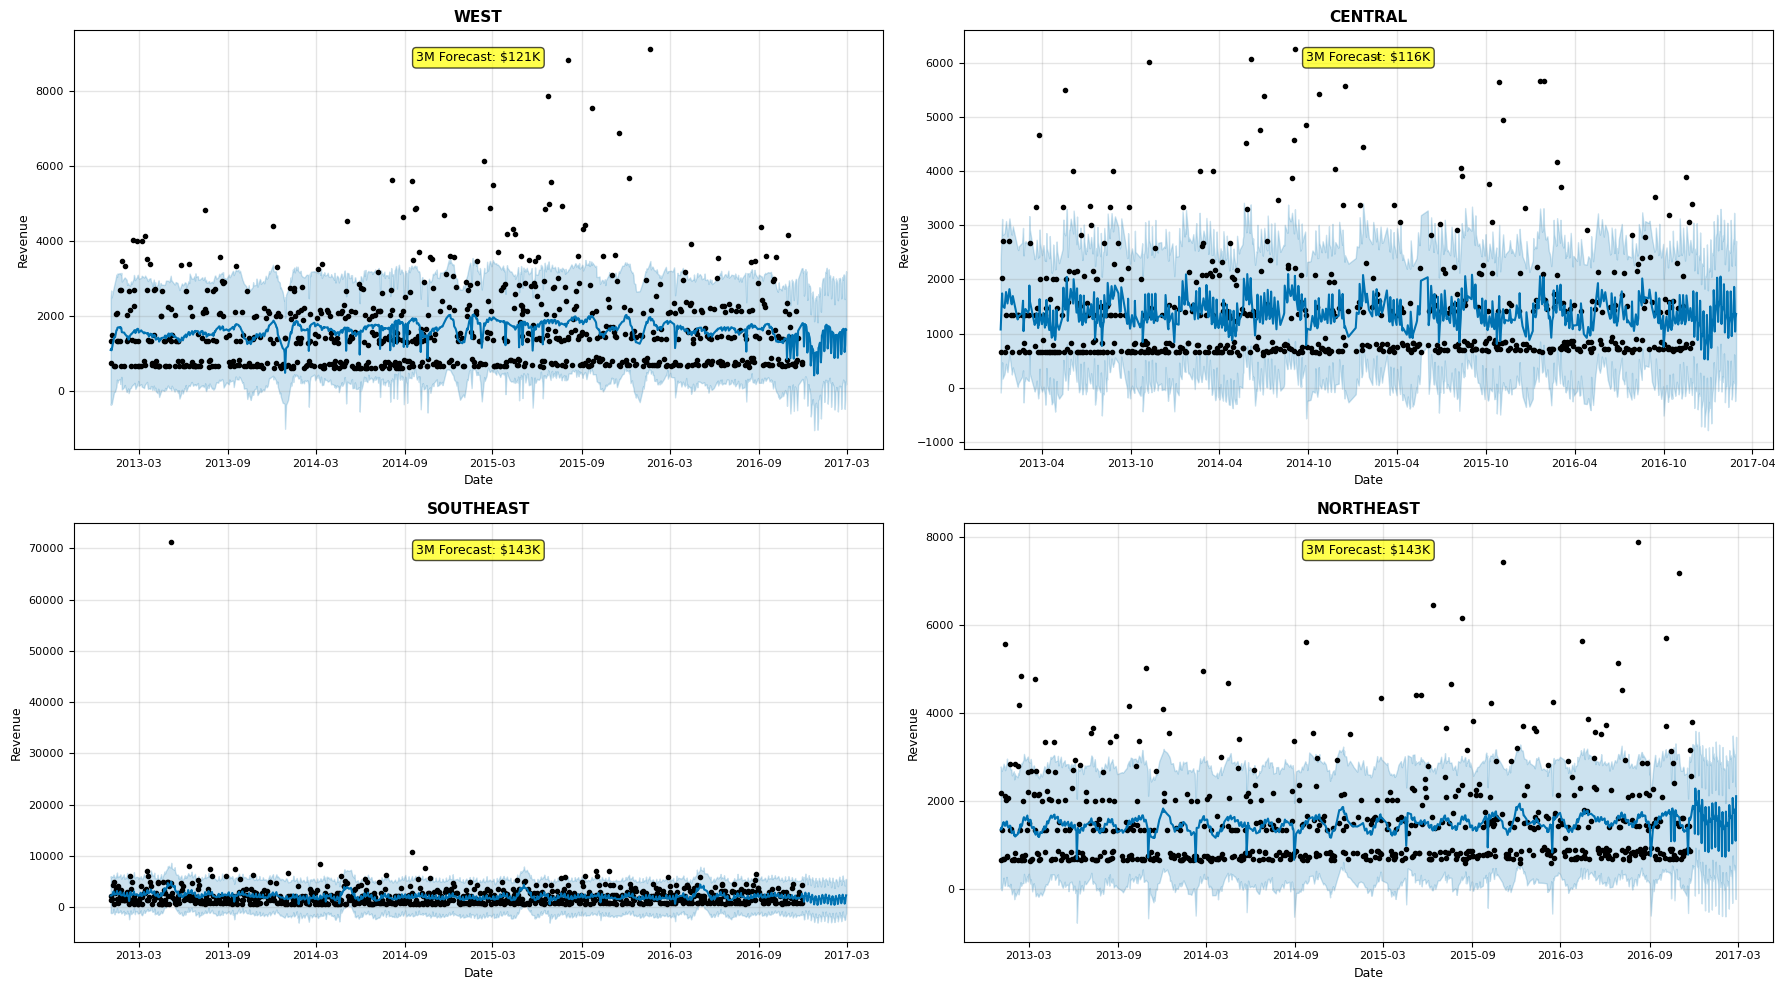


--- REGIONAL FORECAST SUMMARY ---
  NORTHEAST: $143,150
  SOUTHEAST: $143,075
  WEST: $121,114
  CENTRAL: $115,635

✓ Regional forecasts saved


In [54]:
# ====================================================================
# 10. FORECAST BY REGION
# ====================================================================

print("\n" + "="*70)
print("REGIONAL FORECASTING")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

top_regions = df['Location_Region'].unique().tolist()
regional_forecasts = {}

for idx, region in enumerate(top_regions):  # Top 6 regions
    print(f"\nForecasting for {region}...")
    
    # Prepare regional data
    region_daily = df[df['Location_Region'] == region].groupby('Sell_Date').agg({
        'Total_Revenue': 'sum'
    }).reset_index()
    region_daily.columns = ['ds', 'y']
    
    # Train model
    region_model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )
    region_model.fit(region_daily)
    
    # Forecast
    region_future = region_model.make_future_dataframe(periods=90)
    region_forecast = region_model.predict(region_future)
    
    # Store forecast
    future_only = region_forecast[region_forecast['ds'] > region_daily['ds'].max()]
    regional_forecasts[region] = future_only['yhat'].sum()
    
    # Plot
    ax = axes[idx // 2, idx % 2]
    region_model.plot(region_forecast, ax=ax)
    ax.set_title(f'{region}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Date', fontsize=9)
    ax.set_ylabel('Revenue', fontsize=9)
    ax.tick_params(labelsize=8)
    
    # Add forecast annotation
    forecast_total = future_only['yhat'].sum()
    ax.text(0.5, 0.95, f'3M Forecast: ${forecast_total/1000:.0f}K', 
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
            fontsize=9)

plt.tight_layout()
plt.savefig('regional_forecasts.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n--- REGIONAL FORECAST SUMMARY ---")
for region, forecast_val in sorted(regional_forecasts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {region}: ${forecast_val:,.0f}")

print("\n✓ Regional forecasts saved")
